In [103]:
# # the project contains 6 ipynb files
# 1. Project_12_loan
# 2. Project_12_iteration
# 3. Project_12_lrc
# 4. Project_12_svc
# 5. Project_12_gnb
# 6. Project_12_gb

# all the files are in a folder named Project_12

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [2]:
loan=pd.read_csv('loan.csv')

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.shape

(614, 13)

In [5]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# dependents is int but type is object
# we have to change its type

In [7]:
# first, lets see missing values

In [8]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# there are missing values

In [10]:
loan['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
# we won't convert the dtype,
# we'll just label encode it

In [12]:
# lets treat missing values
loan1=loan.copy()

In [13]:
loan1.dropna().shape

(480, 13)

In [14]:
# more than 120 rows removed

In [15]:
# we should better go for imputation

In [16]:
# there are missing values in Gender,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History

In [18]:
loan1['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [20]:
# impute gender with most freq category
loan1['Gender']=loan1['Gender'].fillna('Male')

In [21]:
loan1['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [22]:
# impute gender with most freq category
loan1['Dependents']=loan1['Dependents'].fillna('0')

In [23]:
loan1['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [24]:
# impute gender with most freq category
loan1['Self_Employed']=loan1['Self_Employed'].fillna('No')

In [26]:
loan1['LoanAmount'].mean(),loan1['LoanAmount'].median()

(146.41216216216216, 128.0)

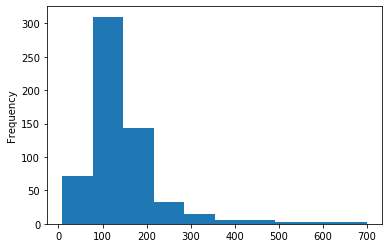

In [28]:
# lets check the distribution first
loan1['LoanAmount'].plot.hist()

In [29]:
# as the distribution is skewed, we'll do for median imputation
loan1['LoanAmount']=loan1['LoanAmount'].fillna(loan1['LoanAmount'].median())

In [30]:
loan1['Loan_Amount_Term'].mean(),loan1['Loan_Amount_Term'].median()

(342.0, 360.0)

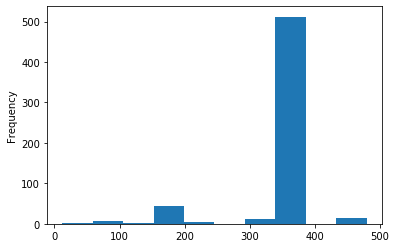

In [31]:
# lets check the distribution first
loan1['Loan_Amount_Term'].plot.hist()

In [32]:
# we'll do for mean imputation
loan1['Loan_Amount_Term']=loan1['Loan_Amount_Term'].fillna(loan1['Loan_Amount_Term'].mean())

In [33]:
loan1['Credit_History'].mean(),loan1['Credit_History'].median()

(0.8421985815602837, 1.0)

In [34]:
loan1['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [35]:
# impute gender with most freq category
loan1['Credit_History']=loan1['Credit_History'].fillna(1.0)

In [36]:
loan1.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [37]:
loan1['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [38]:
# impute gender with most freq category
loan1['Married']=loan1['Married'].fillna('Yes')

In [39]:
# missing values treated

# EDA

# Univariate

In [40]:
loan1.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y


In [41]:
loan1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'], dtype='object')

In [42]:
# drop loanid
loan1.drop('Loan_ID',axis=1,inplace=True)

In [43]:
loan1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.000000,0.855049
std,6109.041673,2926.248369,84.107233,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [44]:
loan1['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

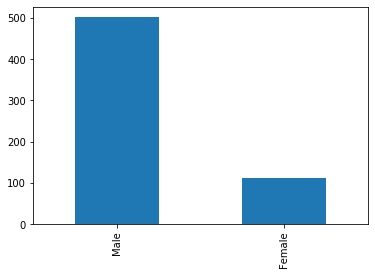

In [45]:
loan1['Gender'].value_counts().plot.bar()

In [46]:
loan1['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

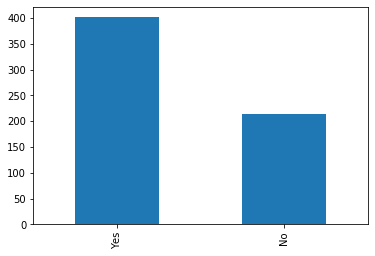

In [47]:
loan1['Married'].value_counts().plot.bar()

In [48]:
loan1['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

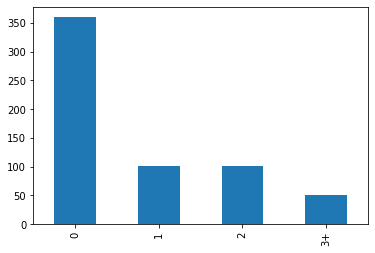

In [49]:
loan1['Dependents'].value_counts().plot.bar()

In [50]:
loan1['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

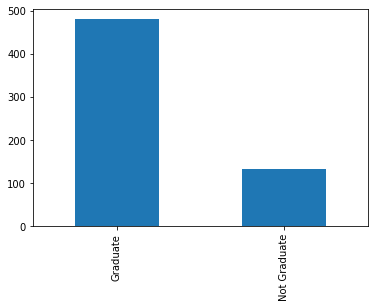

In [51]:
loan1['Education'].value_counts().plot.bar()

In [52]:
loan1['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

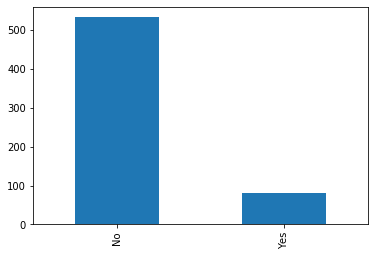

In [53]:
loan1['Self_Employed'].value_counts().plot.bar()

In [54]:
loan1['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

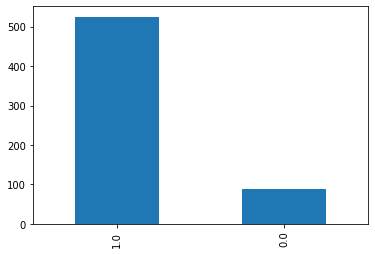

In [55]:
loan1['Credit_History'].value_counts().plot.bar()

In [56]:
loan1['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

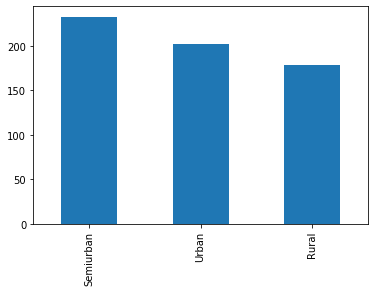

In [57]:
loan1['Property_Area'].value_counts().plot.bar()

In [58]:
loan1['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

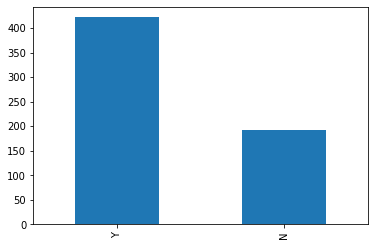

In [59]:
loan1['Loan_Status'].value_counts().plot.bar()

# Bivariate

In [60]:
loan1.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y


In [62]:
loan1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'], dtype='object')

In [63]:
loan1.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,149.890625,344.000000,0.572917
Y,5384.068720,1504.516398,143.869668,341.090047,0.983412


In [64]:
pd.crosstab(loan1['Gender'],loan1['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


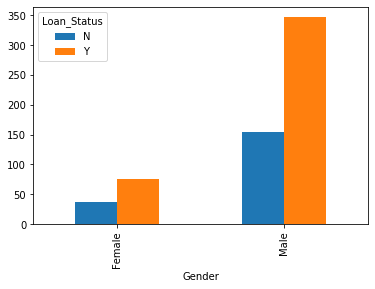

In [65]:
pd.crosstab(loan1['Gender'],loan1['Loan_Status']).plot.bar()

In [66]:
pd.crosstab(loan1['Married'],loan1['Loan_Status'])

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


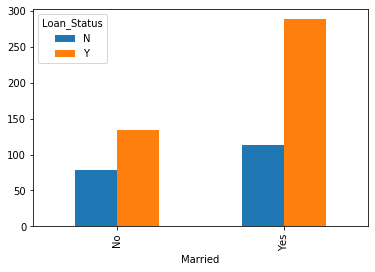

In [67]:
pd.crosstab(loan1['Married'],loan1['Loan_Status']).plot.bar()

In [68]:
pd.crosstab(loan1['Dependents'],loan1['Loan_Status'])

Loan_Status,N,Y
Dependents,,
0,113,247
1,36,66
2,25,76
3+,18,33


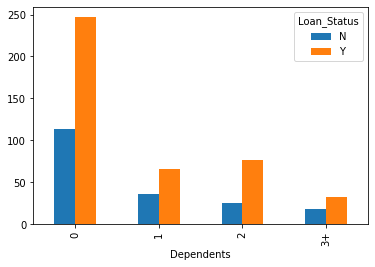

In [69]:
pd.crosstab(loan1['Dependents'],loan1['Loan_Status']).plot.bar()

In [70]:
pd.crosstab(loan1['Education'],loan1['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


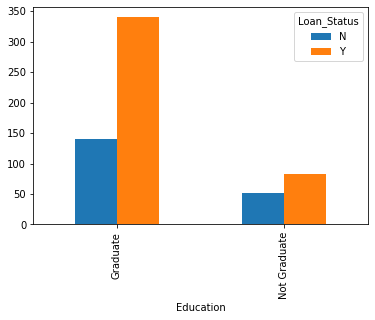

In [71]:
pd.crosstab(loan1['Education'],loan1['Loan_Status']).plot.bar()

In [72]:
pd.crosstab(loan1['Self_Employed'],loan1['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


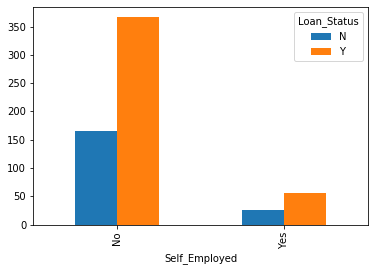

In [73]:
pd.crosstab(loan1['Self_Employed'],loan1['Loan_Status']).plot.bar()

In [74]:
pd.crosstab(loan1['Credit_History'],loan1['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


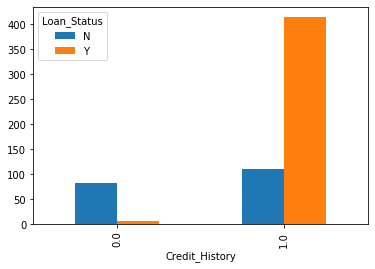

In [75]:
pd.crosstab(loan1['Credit_History'],loan1['Loan_Status']).plot.bar()

In [76]:
pd.crosstab(loan1['Property_Area'],loan1['Loan_Status'])

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


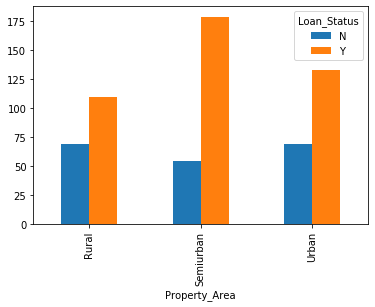

In [77]:
pd.crosstab(loan1['Property_Area'],loan1['Loan_Status']).plot.bar()

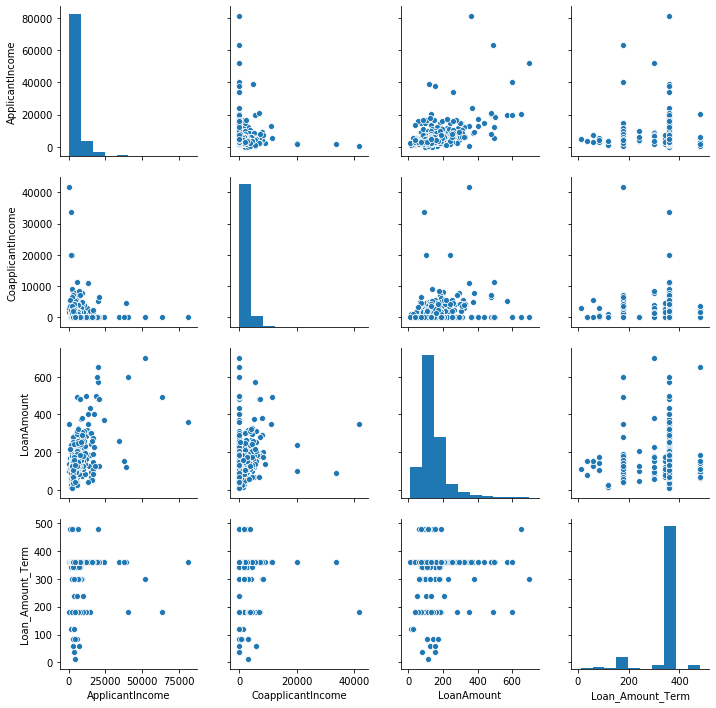

In [78]:
sns.pairplot(data=loan1,vars=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])

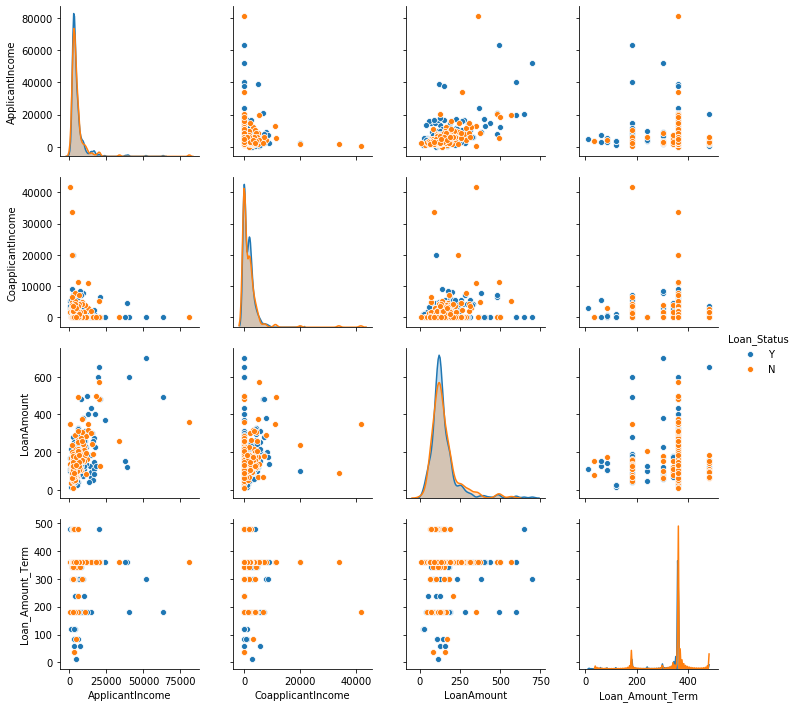

In [79]:
sns.pairplot(data=loan1,vars=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],hue='Loan_Status')

# Distribution and Corr

In [80]:
cols=loan1.columns.values

In [81]:
# In order to make distplot and boxplot, we'll do label encoding

In [82]:
from sklearn.preprocessing import LabelEncoder
def le(df,col):
    lab=LabelEncoder()
    df[col]=pd.Series(lab.fit_transform(df[col]))

In [83]:
cols

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'], dtype=object)

In [84]:
le(loan1,'Gender')
le(loan1,'Married')
le(loan1,'Dependents')
le(loan1,'Education')
le(loan1,'Self_Employed')
le(loan1,'Property_Area')
le(loan1,'Loan_Status')

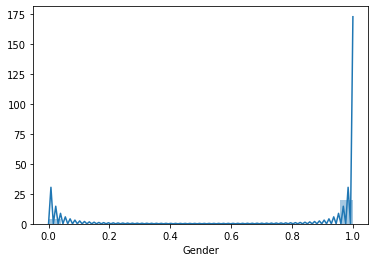

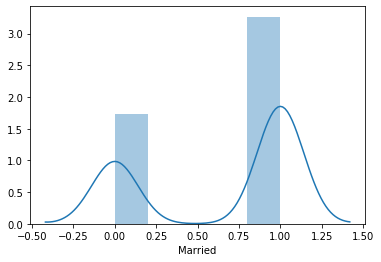

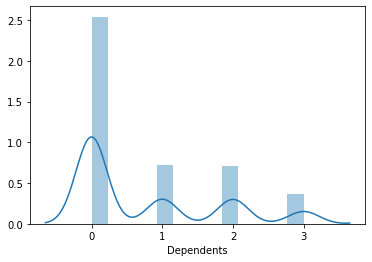

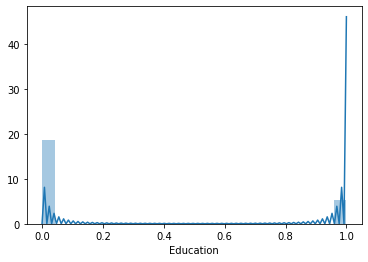

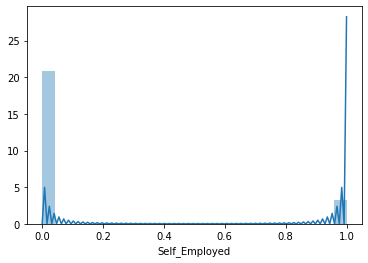

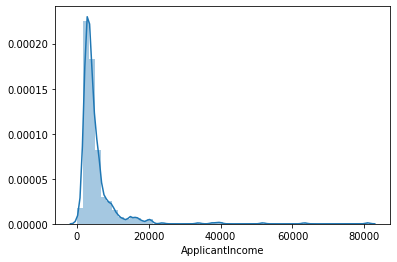

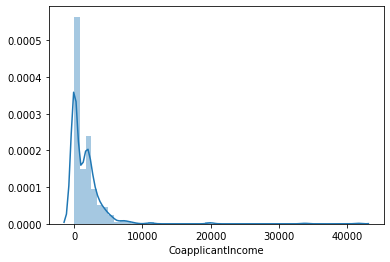

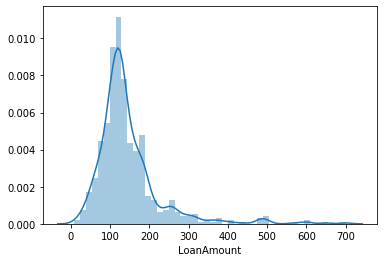

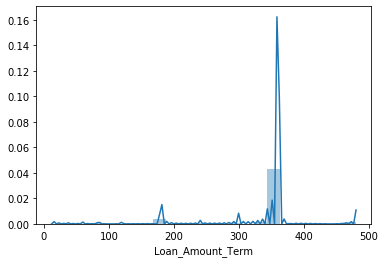

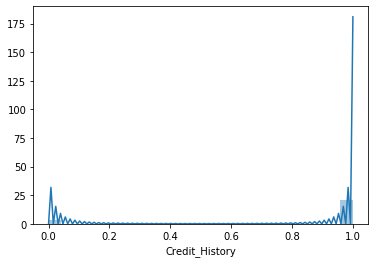

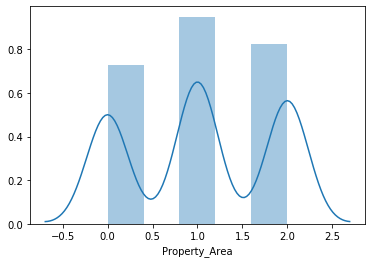

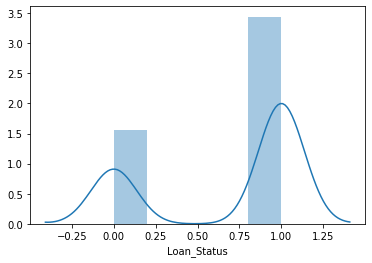

In [85]:
for i in cols:
    plt.subplots()
    sns.distplot(loan1[i])

In [86]:
loan1.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [87]:
# skewness in ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term

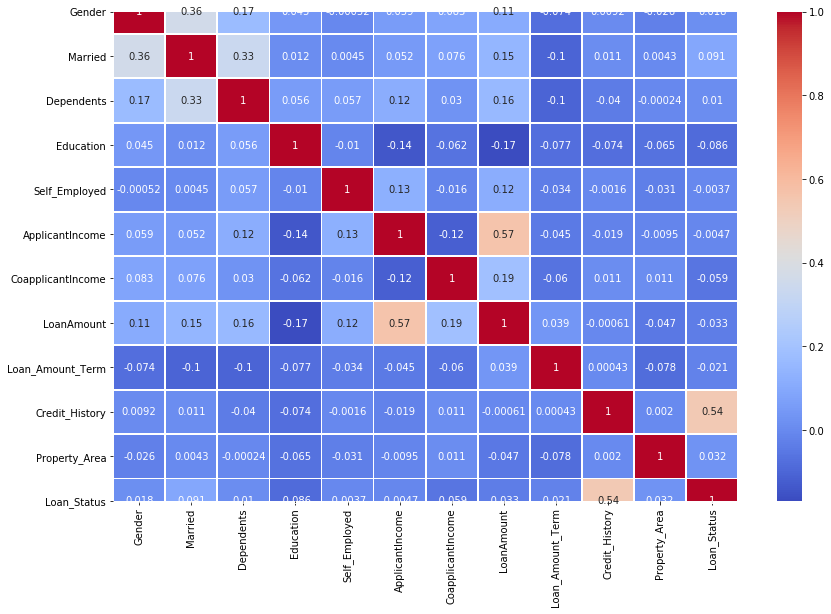

In [88]:
plt.figure(figsize=(14,9))
sns.heatmap(loan1.corr(),annot=True,cmap='coolwarm',linewidths=0.8)

# Outliers

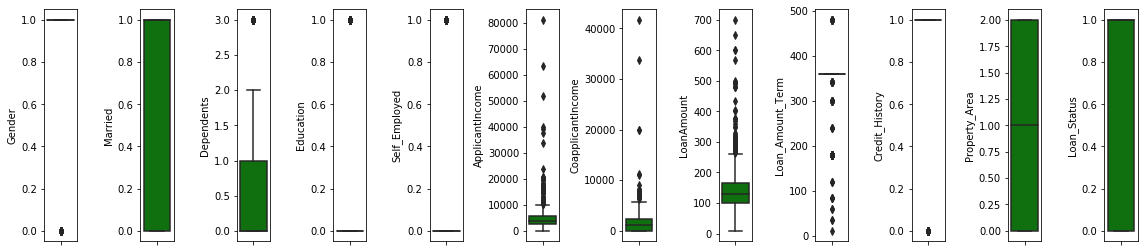

In [89]:
plt.figure(figsize=(16,48))
for i in range(len(cols)):
    plt.subplot(14,12,i+1)
    sns.boxplot(loan1[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [90]:
# using IQR method
def outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out=(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return(df_out.sum())

def lower(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower=Q1 - 1.5 * IQR
    return lower

def upper(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper=Q3 + 1.5 * IQR
    return upper

def remove_outlier(df,col):
    for i in range(df.shape[0]):
        if (df[col].iloc[i])>upper(df,col):
            df[col].iloc[i]=upper(df,col)
        elif (df[col].iloc[i])<lower(df,col):
            df[col].iloc[i]=lower(df,col)

In [91]:
outlier(loan1)

Gender               112
Married                0
Dependents            51
Education            134
Self_Employed         82
ApplicantIncome       50
CoapplicantIncome     18
LoanAmount            41
Loan_Amount_Term     102
Credit_History        89
Property_Area          0
Loan_Status            0
dtype: int64

In [92]:
from scipy.stats import zscore

In [93]:
z=np.abs(zscore(loan1))
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [94]:
len(np.where(z>3)[0])

41

In [96]:
# lets remove these 41 outliers
loan1=loan1[(z<3).all(axis=1)]

# Definitions

In [97]:
# this is a classification problem with 2 classes

In [98]:
# lets seperate x and y first

In [99]:
x=loan1.drop('Loan_Status',axis=1)
y=loan1['Loan_Status']

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate

In [101]:
# Now, let's define some functions to reuse them
def fitc(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    
def get_scorec(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=accuracy_score(pred,y_test)
    return train_score,test_score

def get_predc(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

def get_metricsc(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    conf=confusion_matrix(pred,y_test)
    clas=classification_report(pred,y_test)
    return acc,conf,clas

from sklearn.model_selection import GridSearchCV
def gridcvc(m,p,x,y):
    gkb=GridSearchCV(m,p,n_jobs=-1,cv=5,scoring='accuracy')
    gkb.fit(x,y)
    return gkb.best_params_


from sklearn.model_selection import RandomizedSearchCV
def randomcvc(m,p,x,y):
    from sklearn.model_selection import RandomizedSearchCV
    gkb=RandomizedSearchCV(estimator=m,param_distributions=p,
                          cv=3,n_iter=50,
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)
    gkb.fit(x,y)
    return gkb.best_params_

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
def bfec(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    return xbfe

def ffsc(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    return xffs

from sklearn.decomposition import PCA
def nforpcac(x):
    pca=PCA().fit(x)
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
    plt.xlabel('No of Components')
    plt.ylabel('Variance')
    plt.axhline(y=95, color='r', linestyle='--')
    plt.show()
    
def pcac(m,x,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    return xpca

def crossc(m,x,y,c=5):
    score=cross_val_score(m,x,y,cv=c,n_jobs=-1)
    return (score.mean(), score.std())

from sklearn.preprocessing import StandardScaler
def stdc(x):
    scx=StandardScaler()
    xs=pd.DataFrame(scx.fit_transform(x), columns=x.columns)
    return xs

from sklearn.preprocessing import MinMaxScaler
def mmc(x):
    mm=MinMaxScaler()
    xm=pd.DataFrame(mm.fit_transform(x), columns=x.columns)
    return xm

def modified_bfec(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xbfe,y,test_size=0.25,random_state=45,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=accuracy_score(pred,y_test)
    return test_score

def modified_ffsc(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xffs,y,test_size=0.25,random_state=45,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=accuracy_score(pred,y_test)
    return test_score

def modified_pcac(m,x,y,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    x_train, x_test, y_train, y_test=train_test_split(xpca,y,test_size=0.25,random_state=45,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=accuracy_score(pred,y_test)
    return test_score

def ttsc(x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    return x_train, x_test, y_train, y_test

def classification(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    clas=classification_report(pred,y_test)
    return clas

In [102]:
lrc=LogisticRegression(n_jobs=-1,random_state=45)
dtc=DecisionTreeClassifier(random_state=45)
svc=SVC(random_state=45)
knnc=KNeighborsClassifier(n_jobs=-1)
rfc=RandomForestClassifier(n_jobs=-1,random_state=45)
gbc=GradientBoostingClassifier(random_state=45)
xgbc=XGBClassifier(n_jobs=-1,random_state=45)
adac=AdaBoostClassifier(random_state=45)
gnb=GaussianNB()
mnb=MultinomialNB()